In [1]:
###################################################
##
##                 Partie I
##   Analyse Empirique et Exploratoire  des Données
##
## 1- Lecture des données
## 2- Exploration des données
## 3- Extraction des données pour la première station
## 4- Trace les données pour cette station
##
## Thierry Castel , dernières modifications 2020
####################################################

##### I1- Lecture des données brutes #########
mydata <- read.csv("MFdata.csv")
postesMF <- read.csv("MFpostes.csv")

class(postesMF) ## classe de l'objet


[1] "data.frame"

In [5]:
tail(mydata)  ## affichage des dernières lignes des données

,X,NumPoste,Year,Month,Day,Tn,Tx,RR
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
180787,180787,39275004,2015,12,26,NA,NA,NA
180788,180788,39275004,2015,12,27,NA,NA,NA
180789,180789,39275004,2015,12,28,NA,NA,NA
180790,180790,39275004,2015,12,29,NA,NA,NA
180791,180791,39275004,2015,12,30,NA,NA,NA
180792,180792,39275004,2015,12,31,NA,NA,NA


In [3]:
## I2- Exploration des données
dim(mydata) ## dimension de l'objet
class(mydata) ## classe de l'objet
str(postesMF) ## structure de l'objet avec le type des données contenues

[1] 180792      8

[1] "data.frame"

'data.frame':	9 obs. of  7 variables:
 $ X         : int  1 2 3 4 5 6 7 8 9
 $ NumStation: int  21473001 25462001 39050001 39275004 58062001 58160001 70006001 71105001 89387002
 $ alti      : int  219 831 535 1120 598 175 275 216 70
 $ lat       : num  47.3 46.9 46.8 46.4 47.1 ...
 $ lon       : num  5.09 6.34 5.8 5.96 3.93 ...
 $ LonLB2    : num  808162 904877 864051 878574 721317 ...
 $ LatLB2    : num  2255559 2219107 2204148 2161039 2231250 ...


In [6]:
head(mydata) ## Affichage des premières lignes des données

,X,NumPoste,Year,Month,Day,Tn,Tx,RR
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,21473001,1961,1,1,2.4,4.8,3.1
2,2,21473001,1961,1,2,-1.2,7.8,15.2
3,3,21473001,1961,1,3,4.2,8.0,3.7
4,4,21473001,1961,1,4,2.2,7.3,5.6
5,5,21473001,1961,1,5,2.0,5.8,0.0
6,6,21473001,1961,1,6,-0.4,3.0,4.5


In [7]:
## Suppression de la première colonne
mydata <- mydata[,-1]
head(mydata)

,NumPoste,Year,Month,Day,Tn,Tx,RR
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,21473001,1961,1,1,2.4,4.8,3.1
2,21473001,1961,1,2,-1.2,7.8,15.2
3,21473001,1961,1,3,4.2,8.0,3.7
4,21473001,1961,1,4,2.2,7.3,5.6
5,21473001,1961,1,5,2.0,5.8,0.0
6,21473001,1961,1,6,-0.4,3.0,4.5


In [8]:
## Combien de stations ?
nbrst <- unique(mydata$NumPoste)
length(nbrst)
nbrst

[1] 9

[1] 21473001 25462001 39050001 58062001 58160001 70006001 71105001 89387002
[9] 39275004

In [9]:
## I3- Extraction des données de la première station
mydata.st <- subset(mydata,mydata$NumPoste==nbrst[9])

In [10]:
dim(mydata.st)
head(mydata.st)
tail(mydata.st)

[1] 20088     7

,NumPoste,Year,Month,Day,Tn,Tx,RR
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
160705,39275004,1961,1,1,-1.5,-1.2,7.0
160706,39275004,1961,1,2,-11.5,3.0,19.2
160707,39275004,1961,1,3,0.0,1.0,17.0
160708,39275004,1961,1,4,-4.0,-2.0,16.0
160709,39275004,1961,1,5,-4.2,-1.8,3.0
160710,39275004,1961,1,6,-12.0,-2.5,9.6


,NumPoste,Year,Month,Day,Tn,Tx,RR
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
180787,39275004,2015,12,26,NA,NA,NA
180788,39275004,2015,12,27,NA,NA,NA
180789,39275004,2015,12,28,NA,NA,NA
180790,39275004,2015,12,29,NA,NA,NA
180791,39275004,2015,12,30,NA,NA,NA
180792,39275004,2015,12,31,NA,NA,NA


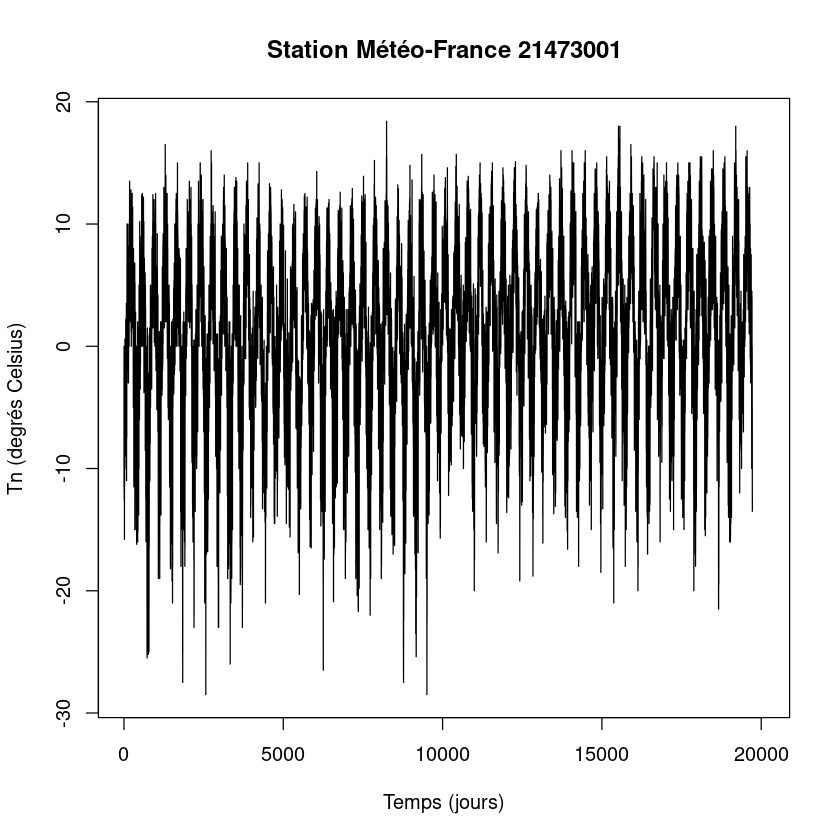

In [11]:
## I4- Trace les températures minimales
##pdf(file="Station.pdf")
plot(mydata.st$Tn,type="l", xlab="Temps (jours)",ylab="Tn (degrés Celsius)",
     main="Station Météo-France 21473001")
##dev.off()
## Ajout des températures maximales sur le graphes
## lines(mydata.st$Tx,col="red")

In [12]:
##########################################################
##  Calcul des moyennes annuelles 
##  1- à partir de fonctions de base et d'une boucle 
##  2- à partir d'un objet série temporelle
##   package utilisé : xts
##########################################################

annees <- unique(mydata$Year)
resu <-c()
for(i in annees){
    #print(i)
    tmp <- subset(mydata.st$Tn, mydata.st$Year==i) ##extrait l'année i
    print(mean(tmp)) ## Affiche la valeur de la moyenne pour l'année i
    resu <- c(resu,mean(tmp, na.rm=TRUE)) ## rempli l'objet resu
}
## faire pour les températures maximales
class(resu)
length(resu)

[1] 1.309315
[1] -0.9923288
[1] -0.4010959
[1] 0.9215847
[1] 0.2572603
[1] 0.6241096
[1] 0.6761644
[1] 0.3803279
[1] -0.2471233
[1] -0.09424658
[1] 0.3583562
[1] 0.4289617
[1] -0.3876712
[1] 0.0139726
[1] -0.6290411
[1] 0.2114754
[1] 1.222192
[1] -0.04219178
[1] 0.5161644
[1] 0.02295082
[1] -0.3961644
[1] 0.430411
[1] 0.8084932
[1] -0.3218579
[1] -0.7569863
[1] -0.4860274
[1] 0.5750685
[1] 1.672951
[1] 2.149041
[1] 1.821096
[1] 1.071781
[1] 1.870492
[1] 1.540822
[1] 2.701096
[1] 1.788767
[1] 1.25847
[1] 2.241918
[1] 1.718356
[1] 2.215068
[1] 2.545082
[1] 2.41726
[1] 2.902466
[1] 2.491781
[1] 2.001366
[1] 1.564384
[1] 2.776712
[1] 2.41589
[1] 2.087432
[1] 2.261644
[1] 1.571233
[1] 2.889315
[1] 2.400273
[1] 1.931507
[1] 3.306849
[1] NA


[1] "numeric"

[1] 55

In [13]:
## création d'un vecteur avec les dates au format texte
mydates <- paste(mydata.st$Year,"-",mydata.st$Month,"-",mydata.st$Day,
                 sep="")
str(mydates)

 chr [1:20088] "1961-1-1" "1961-1-2" "1961-1-3" "1961-1-4" "1961-1-5" ...


In [14]:
class(mydates)
str(mydates)

[1] "character"

 chr [1:20088] "1961-1-1" "1961-1-2" "1961-1-3" "1961-1-4" "1961-1-5" ...


In [15]:
## transformation de ce vecteur de texte en un vecteur de dates
mydates <- as.Date(mydates,"%Y-%m-%d")
str(mydates)
class(mydates)

 Date[1:20088], format: "1961-01-01" "1961-01-02" "1961-01-03" "1961-01-04" "1961-01-05" ...


[1] "Date"

In [52]:
## Création de l'objet séries temporelles xts pour Tn, Tx et RR
## et pour la première station
library(xts)
myxts.st <- xts(mydata.st[,c("Tn","Tx","RR")], order.by=mydates)
class(myxts.st)
str(myxts.st)
tail(myxts.st)

[1] "xts" "zoo"

An ‘xts’ object on 1961-01-01/2015-12-31 containing:
  Data: num [1:20088, 1:3] -1.5 -11.5 0 -4 -4.2 -12 -5 -12.5 -3.5 -7.5 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "Tn" "Tx" "RR"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


           Tn Tx RR
2015-12-26 NA NA NA
2015-12-27 NA NA NA
2015-12-28 NA NA NA
2015-12-29 NA NA NA
2015-12-30 NA NA NA
2015-12-31 NA NA NA

In [53]:
myxts.stnx <- na.omit(myxts.st[,1:2]) ## supprime les NA pour les Tn et les Tx
## Calcul des moyennes annuelles pour Tn et Tx
Tnx.year <- apply.yearly(myxts.stnx, mean)
##tail(Tnx.year)
tail(myxts.stnx)

              Tn   Tx
2014-12-26  -6.0  2.0
2014-12-27  -7.5  0.0
2014-12-28  -5.0 -4.0
2014-12-29 -12.0 -3.5
2014-12-30 -13.5 -1.0
2014-12-31 -12.5 -3.0

In [54]:
head(as.numeric(Tnx.year$Tn))
head(resu)

[1]  1.3093151 -0.9923288 -0.4010959  0.9215847  0.2572603  0.6241096

[1]  1.3093151 -0.9923288 -0.4010959  0.9215847  0.2572603  0.6241096

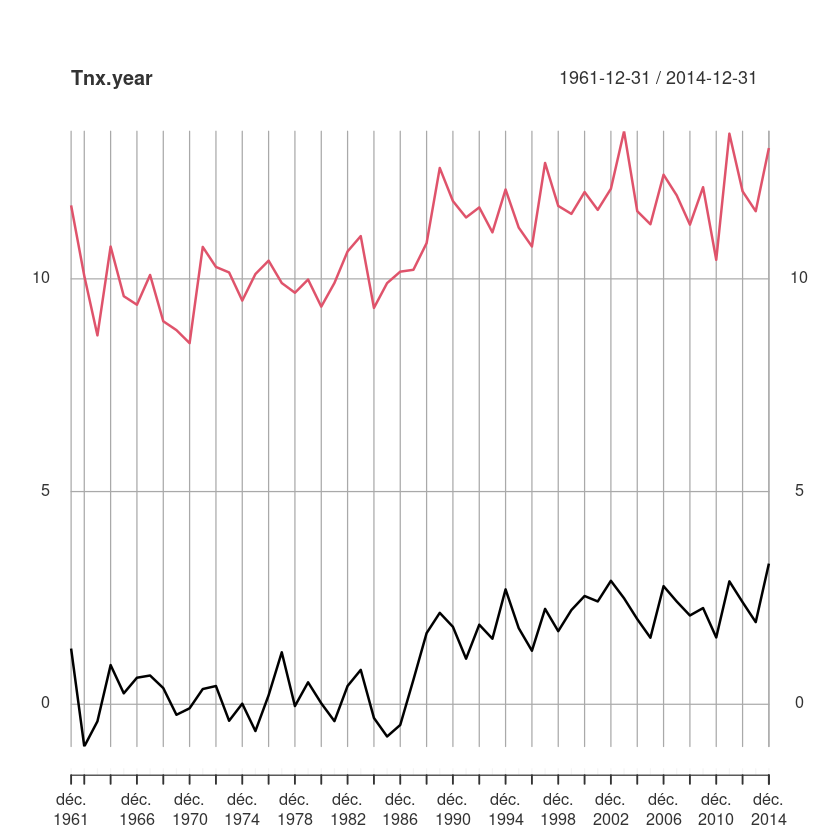

In [55]:
## Trace l'évolution inter-annuelle des Tn et des Tx
plot(Tnx.year)

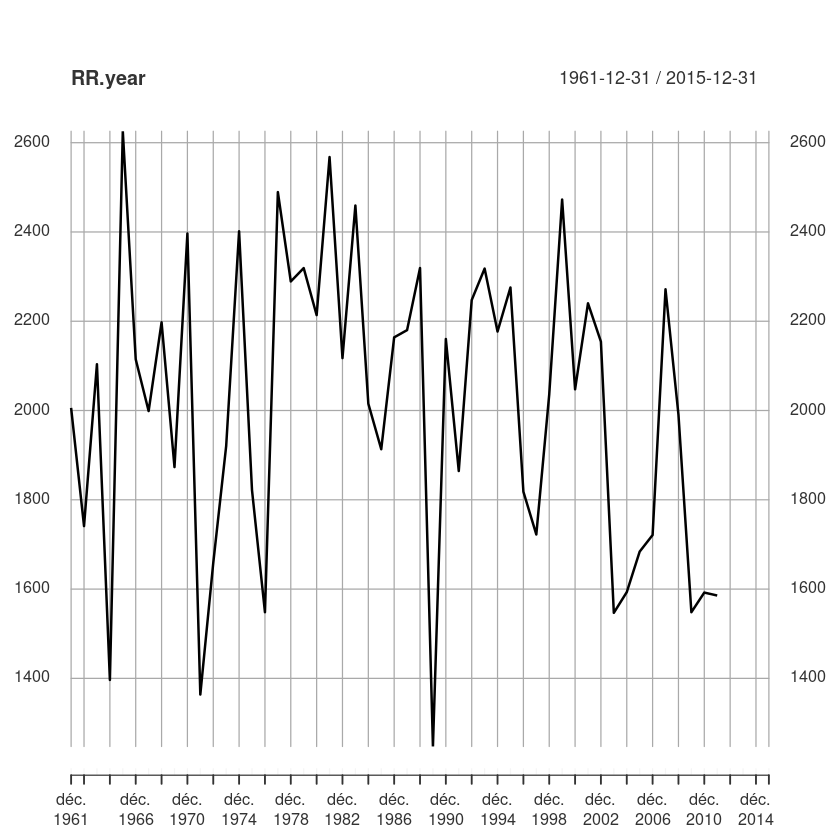

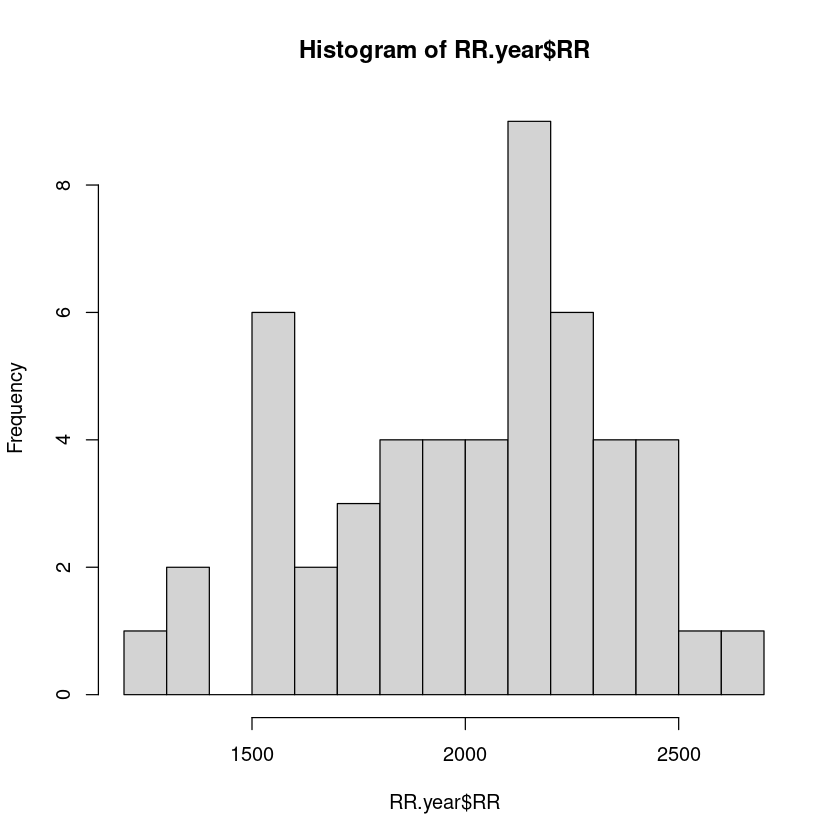

In [68]:
## Calcul des cumuls annuels pour les précipitations
RR.year <- apply.yearly(myxts.st[,3], sum) 
plot(RR.year)
## Passe d'un objet xts à un objet dataframe
hist(RR.year$RR, breaks = 15)
#mydf <- as.data.frame(Tnx.year)
#head(mydf)

In [69]:
####################################################
####################################################
##
## Partie II : analyse de séries
##
## 1- détection de rupture (test de Pettitt)
## 2- détection de tendance (test de Mann-Kendall)
##
## programmation R + package : trend
#####################################################


In [58]:
mydf <- as.data.frame(Tnx.year)
v <- matrix(0,nrow(mydf),1)
u <- matrix(0,nrow(mydf),1)
(mydf)

,Tn,Tx
,<dbl>,<dbl>
1961-12-31,1.30931507,11.727123
1962-12-31,-0.99232877,10.071507
1963-12-31,-0.40109589,8.671233
1964-12-31,0.92158470,10.759563
1965-12-31,0.25726027,9.592603
1966-12-31,0.62410959,9.391781
1967-12-31,0.67616438,10.091507
1968-12-31,0.38032787,9.003005
1969-12-31,-0.24712329,8.795068


In [59]:
for(j in 1:nrow(v)) v[1,1] <- v[1,1]+sign(mydf[1,2]-mydf[j,2])
u[1] <- v[1]

In [60]:
u[1]

[1] 27

In [61]:
## Calcule de la statistique (Ut,T) non-parametrique du test de Pettitt
for(t in 2:nrow(v)){
    for(j in 1:nrow(v)) v[t,1] <- v[t,1]+sign(mydf[t,2]-mydf[j,2])
    u[t,1] <- u[t-1,1]+v[t,1]
}

(kt <- max(abs(u)))
## rang 
(which.max(abs(u)))

[1] 689

[1] 27

In [62]:
## seuil de significativité pour Kt 
n <- nrow(mydf)
poa <- 2*exp(-6*kt^2/(n^3+n^2))
poa
## seuil théorique à 95%
uc95=sqrt((n^3+n^2)*log(0.05)/(-6))  ## val critique val abs u(t)>uc;
## seuil theorique à 99%
uc99=sqrt((n^3+n^2)*log(0.01)/(-6)) ## val critique val abs u(t)>uc;
uc95;uc99

[1] 3.87277e-08

[1] 282.9769

[1] 350.8507

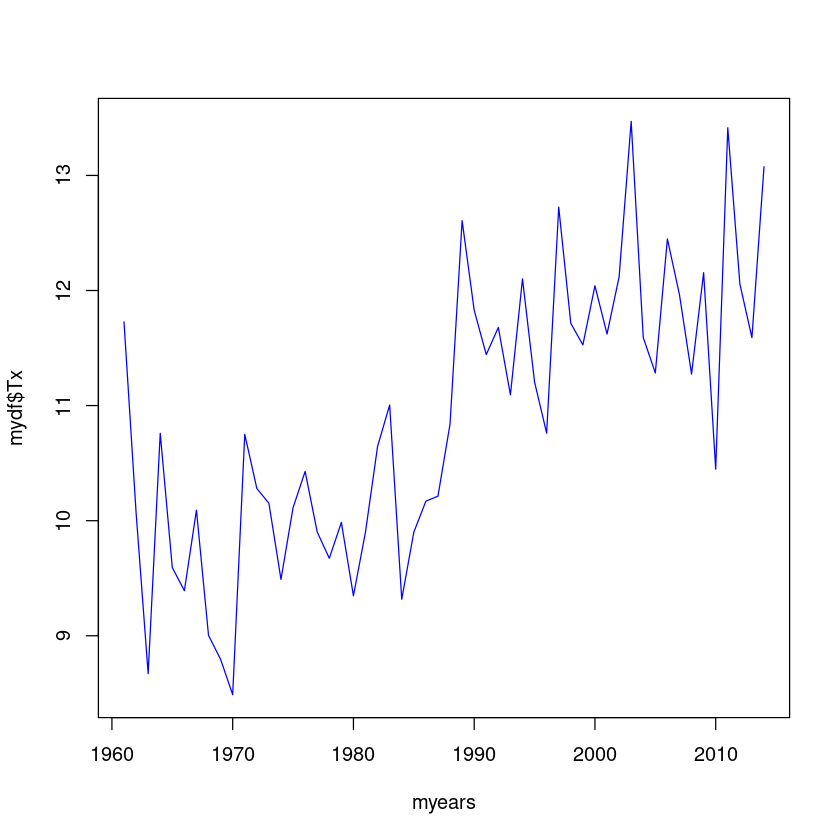

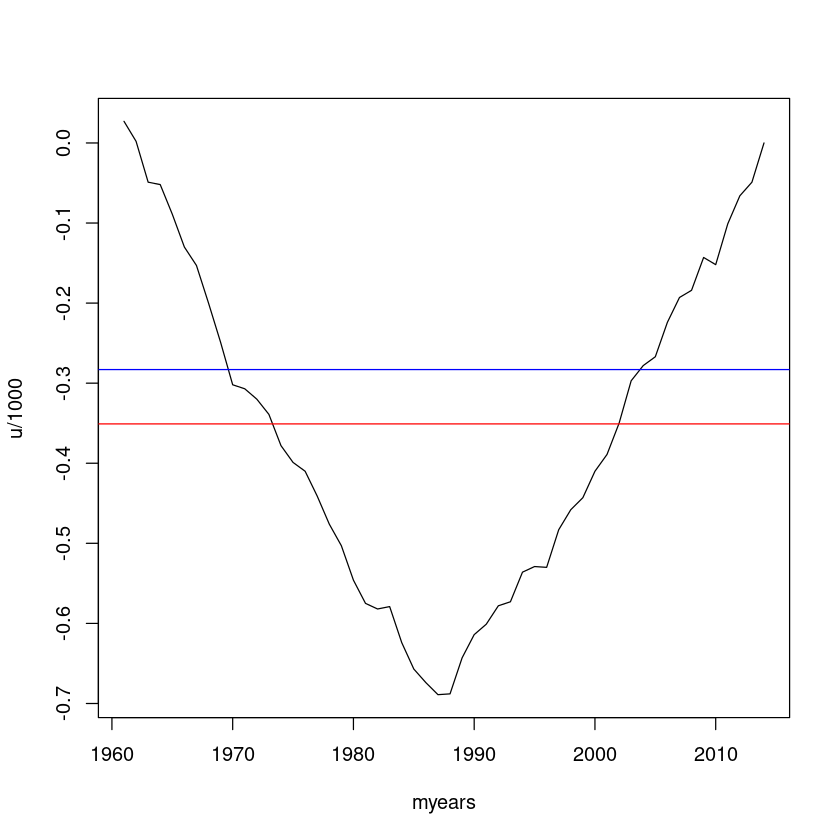

In [63]:
myears <- as.integer(substr(row.names(mydf),1,4))
plot(myears,mydf$Tx, type="l", col="blue")

plot(myears,u/1000, type="l", col="black")
abline(h=-uc95/1000,col='blue',xlim=c(1960,2015))
abline(h=-uc99/1000,col='red',xlim=c(1960,2015))

In [73]:
#######################################################
## Vérification pour le test de rupture
## comparer avec les résultats obtenus précédemment
## utilisation du package trend

library(trend)

ptest <- pettitt.test(mydf[,2])
(ptest)
annees[ptest$estimate]



	Pettitt's test for single change-point detection

data:  mydf[, 2]
U* = 689, p-value = 3.873e-08
alternative hypothesis: two.sided
sample estimates:
probable change point at time K 
                             27 


[1] 1987

In [65]:
################################################
## test de tendance
mk.test(mydf[,2])
## les test nous indique s'il y a présence ou absence de tendance
## et le signe de la tendance mais ne nous dit rien sur le type de tendance
## linéaire, non-linéaire, par blocs etc.
##
################################################


	Mann-Kendall trend test

data:  mydf[, 2]
z = 5.7296, n = 54, p-value = 1.007e-08
alternative hypothesis: true S is not equal to 0
sample estimates:
           S         varS          tau 
7.690000e+02 1.796700e+04 5.373864e-01 


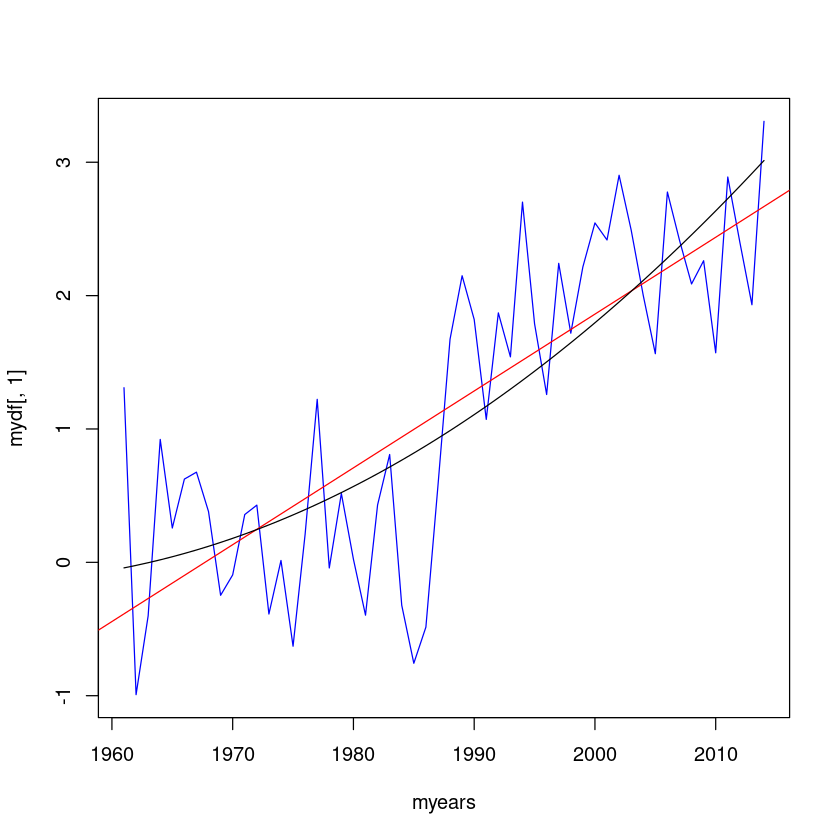

In [66]:
## Trace la tendance linéaire
plot(myears,mydf[,1], type="l", col="blue")
trend.l <- lm(mydf[,1]~myears)
abline(trend.l,col="red")
trend.nl <- lm(mydf[,1] ~ myears + I(myears^2))
## Trace la tendance non-linéaire
lines(myears,predict(trend.nl),col="black")

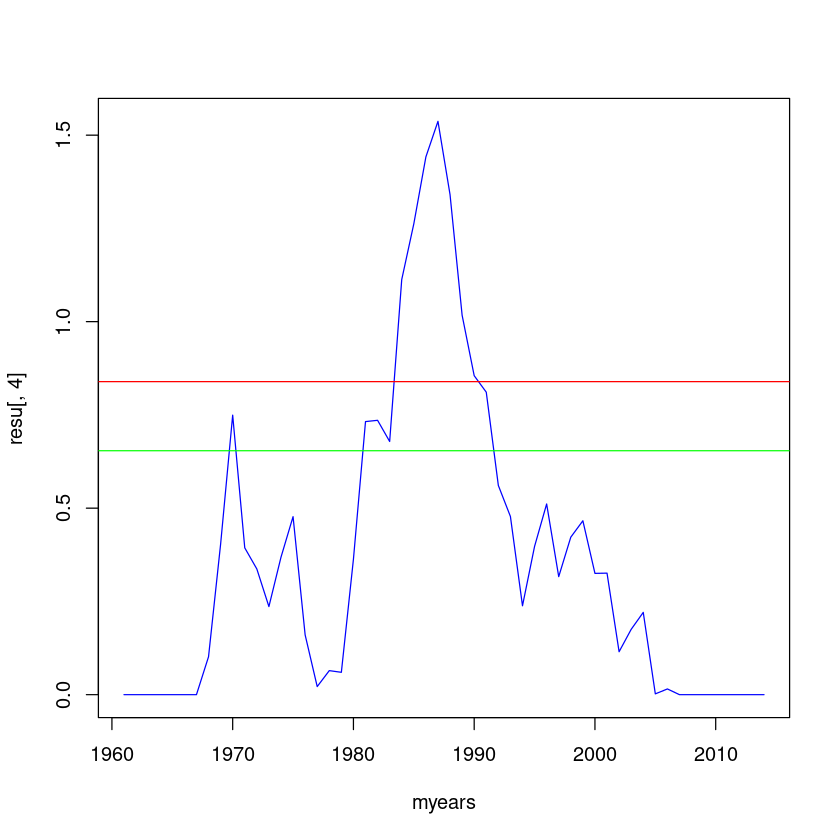

In [67]:
#######################################################
##
## Test par fenêtre glissante
## SMWDA : Split Moving Windows Dissimilarity Analysis
##
#######################################################

source("smwda.R")

## taille de la fenêtre
ws <- c(4,8,12,16)
resu <- c()
## Boucle sur les différentes fenêtres
for(j in seq(along=ws)){
    ## calcul de la métrique i.e. distance euclidienne
    rtmp <- smwda(M=mydf[,2],Q=ws[j])
    ## complète les valeur manquantes début et fin de série
    ## en fonction de la taille de la fenêtre
    rtmp <- c(rep(0,(ws[j]/2)-1),rtmp,rep(0,(ws[j]/2)))
    resu <- cbind(resu,rtmp)
}

## Calcul du seuil théorique de signification pour 5% et 1%
resu.test <- monte.smwda(M=mydf[,1],lws=ws,rn=1000)

plot(myears,resu[,4], type="l", col="blue")
abline(h=resu.test[4,1],col='green',xlim=c(1960,2015))
abline(h=resu.test[4,2],col='red',xlim=c(1960,2015))


In [32]:
resu.test

test95,test99
1.3409148,1.755521
1.1512655,1.498440
0.9987907,1.326008
0.8914910,1.163866


In [33]:
#########################################################
##
##                   Travaux à faire :
##  - refaire pour les Tn, Tx et RR et pour toutes les stations
##  - que déduire de l'ensemble de ces résultats ?
##
##########################################################